# Homework 7ate9

# 1.

A Simple Linear Regression model describes a relationship between two variables by fitting a straight line to predict an outcome variable based on a predictor. This line has two main parts: the intercept, which is the starting point of the line when the predictor is zero, and the slope, which shows how much the outcome changes for each increase in the predictor. Because real data is often a bit scattered, we add an error term to account for random differences, assuming these errors follow a normal distribution. Altogether, this model creates a distribution of outcomes centered around the line, allowing us to see the general trend and natural variation in the data.

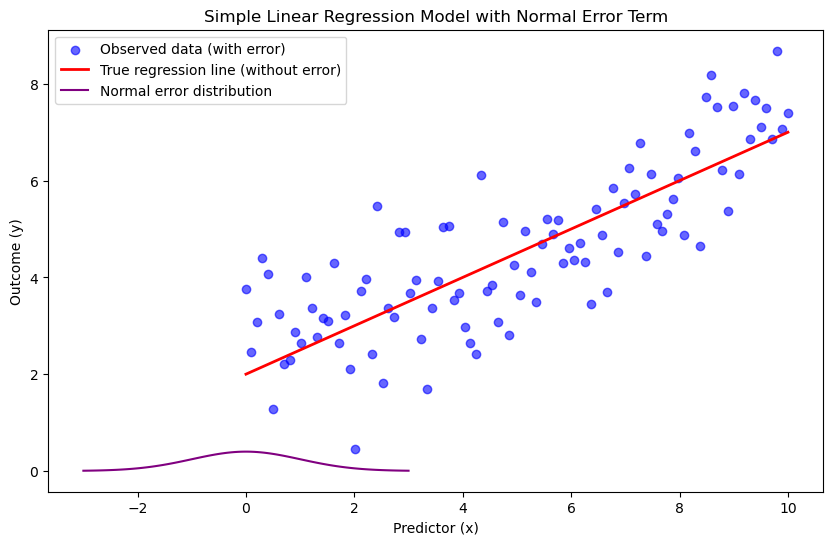

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Set parameters for the regression model
np.random.seed(0)  # For reproducibility
n = 100  # Number of samples
intercept = 2.0  # True intercept
slope = 0.5  # True slope
error_std = 1.0  # Standard deviation of the error term

# 2. Generate predictor variable (x) and outcome variable (y) with error
x = np.linspace(0, 10, n)
# Calculate the true line (without error)
y_true = intercept + slope * x
# Add normally distributed error to y
errors = np.random.normal(0, error_std, n)
y_observed = y_true + errors

# 3. Plot the data, true line, and observed data
plt.figure(figsize=(10, 6))
plt.scatter(x, y_observed, color="blue", label="Observed data (with error)", alpha=0.6)
plt.plot(x, y_true, color="red", label="True regression line (without error)", linewidth=2)

# 4. Display the normal distribution of errors (mean=0, std=error_std)
error_range = np.linspace(-3*error_std, 3*error_std, 100)
plt.plot(error_range, norm.pdf(error_range, 0, error_std), color="purple", label="Normal error distribution")

# Labels and legend
plt.xlabel("Predictor (x)")
plt.ylabel("Outcome (y)")
plt.legend()
plt.title("Simple Linear Regression Model with Normal Error Term")
plt.show()


# 2.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     182.7
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           3.98e-24
Time:                        04:25:08   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2085      0.201     10.968      0.0

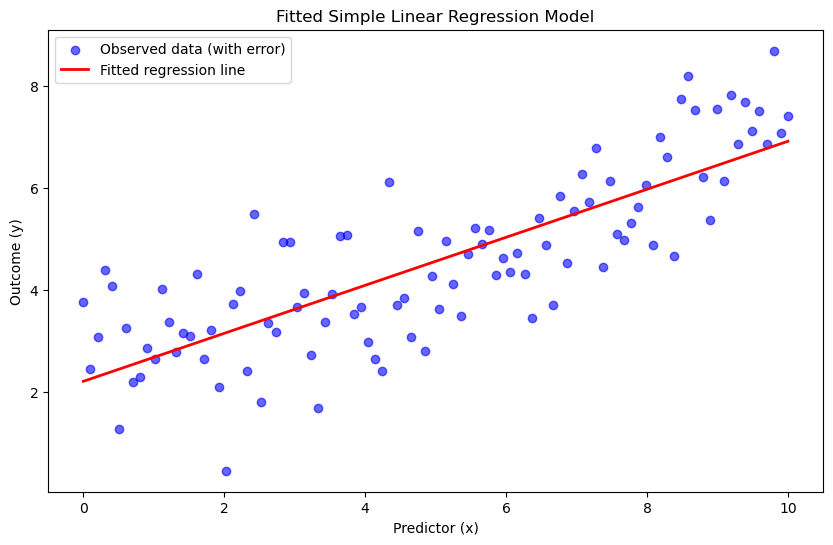

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set parameters for the theoretical Simple Linear Regression model
np.random.seed(0)  # For reproducibility
n = 100  # Number of samples
intercept = 2.0  # True intercept
slope = 0.5  # True slope
error_std = 1.0  # Standard deviation of the error term

# Generate predictor variable (x) and outcome variable (y) with error
x = np.linspace(0, 10, n)
y_true = intercept + slope * x
errors = np.random.normal(0, error_std, n)
y_observed = y_true + errors

# Create a pandas DataFrame to hold the simulated data
data = pd.DataFrame({'x': x, 'y': y_observed})

# Fit the Simple Linear Regression model using statsmodels
model = smf.ols('y ~ x', data=data).fit()

# Print the model summary to show the estimated coefficients
print(model.summary())

# Plot the observed data and the fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label="Observed data (with error)", alpha=0.6)
plt.plot(data['x'], model.predict(data['x']), color='red', label="Fitted regression line", linewidth=2)

# Labels and legend
plt.xlabel("Predictor (x)")
plt.ylabel("Outcome (y)")
plt.legend()
plt.title("Fitted Simple Linear Regression Model")
plt.show()

### ChatGPT Link for Thus Far: https://chatgpt.com/share/672d5c99-c14c-8003-ad0a-9bc28803f413

### Summary:
Our interaction covered the following steps:

1. **Explained the Simple Linear Regression model** by describing its components (predictor, outcome, slope, intercept, and error term) and how they form a sample from a normal distribution.
2. **Created Python code** using `numpy` and `scipy.stats` to simulate data based on a theoretical Simple Linear Regression model, visualizing it with a true regression line and random errors.
3. **Demonstrated model fitting** with `pandas` and `statsmodels` on a simulated dataset to estimate the intercept and slope, and plotted the fitted line against observed data points.

This approach combined theory with code implementation, culminating in a practical application that visualizes and validates the Simple Linear Regression model.

# 3.

In the first graph, the "true" line represents the ideal relationship between the predictor and outcome variables, assuming no randomness. This line follows the exact pattern dictated by the slope and intercept. In the second graph, the fitted regression line is based on the actual observed data, which includes random noise or error. This noise causes the data points to scatter around the true line, reflecting real-world variations. The main difference is that the true line shows a perfect relationship without any errors, while the fitted line tries to capture the underlying trend despite the natural variability in the data.

# 4.

The fitted_model.fittedvalues are derived by using the estimated coefficients (intercept and slope) found in fitted_model.params, which can be seen in fitted_model.summary().tables[1]. These coefficients represent the best-fit line learned from the data. To calculate the fitted values, the predictor values (X) from the dataset are plugged into the linear equation: Ŷ = β₀ + β₁ * X. The result gives the model's predictions for each observed data point, based on the estimated relationship between the predictor and outcome variables. These fitted values reflect the model’s understanding of the data’s underlying pattern.

# 5.

The ordinary least squares method selects the line that minimizes the sum of the squared differences between the observed data points and the predicted values from the model. These differences are known as residuals. By squaring the residuals, ordinary least squares ensures that both positive and negative deviations from the line contribute equally to the overall error. The reason for using squares is to avoid cancellation between positive and negative residuals and to give more weight to larger deviations. This approach results in the line that best fits the observed data by minimizing the total error in the predictions.

# 6.

#1 calculates the proportion of variation in Y explained by the model. It compares how much the model's predictions (fitted values) reduce the total variation in Y. This is essentially the R-squared value, which tells us how well the model fits the data. A higher R-squared means the model is more accurate.

fitted_model.rsquared is directly the proportion of variation explained by the model, so it's a measure of accuracy. 

The np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 expression also gives the R-squared value by measuring the strength of the linear relationship between Y and the fitted values.

np.corrcoef(Y, x)[0,1]**2 shows how strongly Y is related to the predictor X. A stronger relationship means the model is more likely to explain the variation in Y accurately.

# 7.

In Simple Linear Regression, two main assumptions don’t quite fit with this data. First, the model assumes a straight-line relationship between the predictor and the outcome, meaning crop yield should increase at a consistent rate with fertilizer. Here, however, the relationship looks more curved, with yield rising faster as more fertilizer is used. Second, the model assumes that the spread of errors, or residuals, is similar across all levels of fertilizer. But in this data, the errors vary more at higher fertilizer amounts, showing that the spread is not constant. These issues suggest a simple linear model may not be the best fit for capturing the pattern in this data, and a different approach might work better.

# 8.

To test if there’s a link between waiting time and eruption duration in the Old Faithful dataset, we assume there's no connection (the null hypothesis: (H₀: Beta = 0)) and then check if there might be one (the alternative hypothesis: (H₁: Beta ≠ 0)). After running the analysis, we focus on the p-value for the waiting coefficient. If the p-value is under 0.01, it suggests a significant relationship, so we reject the null hypothesis. If the p-value is higher than 0.01, we might not have enough evidence to say that waiting time and eruption duration are related. We also use the R^2 value to see how well waiting time explains the variation in eruption duration.

# 9.

To see if there’s a connection between waiting time and eruption duration when the waiting time is short (less than 62, 64, or 66 minutes), we first filter the data to only include those shorter wait times. Then, we run a linear regression to check if there's a relationship between the two variables. If the p-value for waiting time is below 0.05, it suggests there is a significant link, and we can reject the idea that there's no relationship. If the p-value is above 0.05, it means we don’t have strong enough evidence to say that waiting time affects eruption duration. The scatter plot with the trendline also helps us see the relationship more clearly. By trying different cutoffs for short wait times, we can check if the pattern holds up across different limits.

# 10.

#### 10.1

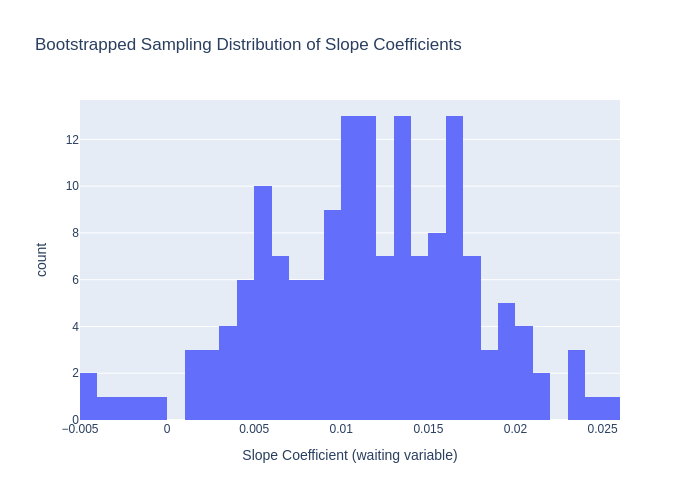

In [8]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Assuming old_faithful is already loaded with the data
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Bootstrap settings
n = 160  # Number of bootstrap samples
bootstrap_slope_coeffs = []

# Bootstrap process
for _ in range(n):
    # Sample with replacement
    bootstrap_sample = old_faithful[long_wait].sample(n=len(old_faithful[long_wait]), replace=True)
    
    # Fit a Simple Linear Regression model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Collect the slope coefficient (ignoring the intercept)
    bootstrap_slope_coeffs.append(model.params['waiting'])

# Create a DataFrame to hold the slope coefficients
slope_df = pd.DataFrame({'bootstrap_slope': bootstrap_slope_coeffs})

# Visualize the bootstrapped sampling distribution of the slope coefficients
fig = px.histogram(slope_df, x='bootstrap_slope', nbins=30, 
                   title='Bootstrapped Sampling Distribution of Slope Coefficients',
                   labels={'bootstrap_slope': 'Slope Coefficient (waiting variable)'})
fig.show(renderer="png")

#### 10.2

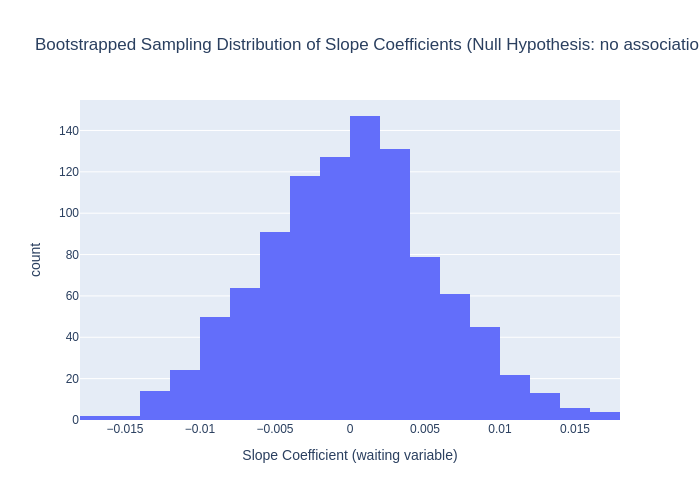

In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters for the simulation under the null hypothesis (no linear relationship)
beta_0 = 1.65  # Intercept
beta_1 = 0      # Slope (no linear relationship)
sigma = 0.37    # Standard deviation of error term
n = 160         # Sample size per bootstrap sample
num_simulations = 1000  # Number of simulations

# Simulate waiting times (X values)
# We'll use the `waiting` values from the `old_faithful` dataset, assuming it is already loaded
waiting_values = old_faithful.waiting[long_wait].values

# Bootstrap sample for each simulation
slope_coeffs_null = []

for _ in range(num_simulations):
    # Simulate Y values based on the model: Y = beta_0 + beta_1 * X + epsilon
    epsilon = np.random.normal(loc=0, scale=sigma, size=n)  # Error term
    Y_simulated = beta_0 + beta_1 * waiting_values[:n] + epsilon  # Simulated Y
    
    # Create a DataFrame for the simulated data
    simulated_data = pd.DataFrame({'waiting': waiting_values[:n], 'duration': Y_simulated})
    
    # Fit a Simple Linear Regression model to the simulated data
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Collect the slope coefficient (ignoring the intercept)
    slope_coeffs_null.append(model.params['waiting'])

# Create a DataFrame to hold the slope coefficients
slope_df_null = pd.DataFrame({'bootstrap_slope': slope_coeffs_null})

# Visualize the bootstrapped sampling distribution of the slope coefficients under the null hypothesis
fig = px.histogram(slope_df_null, x='bootstrap_slope', nbins=30, 
                   title='Bootstrapped Sampling Distribution of Slope Coefficients (Null Hypothesis: no association)',
                   labels={'bootstrap_slope': 'Slope Coefficient (waiting variable)'})
fig.show(renderer="png")

#### 10.3

In [5]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters for the simulation under the null hypothesis (no linear relationship)
beta_0 = 1.65  # Intercept
beta_1 = 0      # Slope (no linear relationship)
sigma = 0.37    # Standard deviation of error term
n = 160         # Sample size per bootstrap sample
num_simulations = 1000  # Number of simulations

# Simulate waiting times (X values)
waiting_values = old_faithful.waiting[long_wait].values

# Bootstrap sample for each simulation
slope_coeffs_null = []

for _ in range(num_simulations):
    # Simulate Y values based on the model: Y = beta_0 + beta_1 * X + epsilon
    epsilon = np.random.normal(loc=0, scale=sigma, size=n)  # Error term
    Y_simulated = beta_0 + beta_1 * waiting_values[:n] + epsilon  # Simulated Y
    
    # Create a DataFrame for the simulated data
    simulated_data = pd.DataFrame({'waiting': waiting_values[:n], 'duration': Y_simulated})
    
    # Fit a Simple Linear Regression model to the simulated data
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Collect the slope coefficient (ignoring the intercept)
    slope_coeffs_null.append(model.params['waiting'])

# Create a DataFrame to hold the slope coefficients
slope_df_null = pd.DataFrame({'bootstrap_slope': slope_coeffs_null})

# Calculate the 95% confidence interval for the bootstrapped slope coefficients
lower_bound = np.percentile(slope_df_null['bootstrap_slope'], 2.5)
upper_bound = np.percentile(slope_df_null['bootstrap_slope'], 97.5)

# Check if 0 is within the 95% bootstrapped confidence interval
contains_zero = lower_bound <= 0 <= upper_bound

# Fit the original model to the data
original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()

# Get the p-value from the original model
original_p_value = original_model.pvalues['waiting']

# Report the results
print(f"95% Bootstrapped Confidence Interval for Slope: ({lower_bound:.4f}, {upper_bound:.4f})")
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")
print(f"Simulated p-value: {original_p_value:.4f}")

# Plot the histogram for the bootstrapped slope distribution
fig = px.histogram(slope_df_null, x='bootstrap_slope', nbins=30, 
                   title='Bootstrapped Sampling Distribution of Slope Coefficients (Null Hypothesis: no association)',
                   labels={'bootstrap_slope': 'Slope Coefficient (waiting variable)'})


95% Bootstrapped Confidence Interval for Slope: (-0.0116, 0.0105)
Does the 95% CI contain 0? Yes
Simulated p-value: 0.0381


# 11.

To test whether waiting time affects eruption duration, we categorize the wait times into "short" (under 68 minutes) and "long" (68 minutes or more). The hypothesis we're testing is whether there's any difference in eruption durations between these two groups. If the p-value for the "long" category is below 0.05, we can say that there's strong evidence suggesting a difference in eruption durations between short and long wait times. The boxplot gives a clear visual of how the durations vary between these two categories, helping us further understand whether the difference is significant.

# 12.

Model 1's histogram shows residuals that are roughly bell-shaped and symmetric, suggesting normality. Model 2 has a slight skew, but still resembles normality. Model 3 shows clear skewness, indicating a departure from normality, while Model 4 has a bimodal distribution, further violating the normality assumption. In summary, Model 1 supports normality, while Models 3 and 4 do not. Model 2 is somewhat close but not perfect.

# 13.

#### A)

In [15]:
import numpy as np
import pandas as pd
import random

# Extract the 'short' and 'long' groups based on the 'kind' column
short_group = old_faithful[old_faithful['kind'] == 'short']['duration']
long_group = old_faithful[old_faithful['kind'] == 'long']['duration']

# Compute the observed difference in means
observed_diff = np.mean(short_group) - np.mean(long_group)

# Combine both groups to shuffle labels later
combined_group = pd.concat([short_group, long_group])

# Number of permutations
num_permutations = 10000
permuted_diffs = []

# Perform the permutation test
for _ in range(num_permutations):
    # Shuffle the combined group and split it into two new groups
    shuffled_group = combined_group.sample(frac=1, replace=False).reset_index(drop=True)
    new_short_group = shuffled_group[:len(short_group)]
    new_long_group = shuffled_group[len(short_group):]

    # Compute the difference in means for this permutation
    permuted_diff = np.mean(new_short_group) - np.mean(new_long_group)
    permuted_diffs.append(permuted_diff)

# Convert the list of permuted differences to a numpy array
permuted_diffs = np.array(permuted_diffs)

# Compute the p-value: the proportion of permuted differences as extreme as the observed difference
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Output the results
print(f"Observed Difference in Means: {observed_diff}")
print(f"P-value from Permutation Test: {p_value}")

Observed Difference in Means: -2.2036002325581396
P-value from Permutation Test: 0.0


#### B)

In [16]:
import numpy as np
import pandas as pd

# Extract the 'short' and 'long' groups based on the 'kind' column
short_group = old_faithful[old_faithful['kind'] == 'short']['duration']
long_group = old_faithful[old_faithful['kind'] == 'long']['duration']

# Number of bootstrap iterations
num_bootstrap_iterations = 10000
bootstrapped_mean_differences = []

# Perform bootstrapping
for _ in range(num_bootstrap_iterations):
    # Resample with replacement for both groups
    short_sample = short_group.sample(n=len(short_group), replace=True)
    long_sample = long_group.sample(n=len(long_group), replace=True)

    # Compute the mean for each resampled group
    short_mean = short_sample.mean()
    long_mean = long_sample.mean()

    # Calculate the difference in means and store it
    bootstrapped_mean_differences.append(short_mean - long_mean)

# Convert the list of differences to a numpy array
bootstrapped_mean_differences = np.array(bootstrapped_mean_differences)

# Compute the 95% confidence interval: the 2.5th and 97.5th percentiles
confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Output the results
print(f"95% Bootstrap Confidence Interval for the Difference in Means: {confidence_interval}")

95% Bootstrap Confidence Interval for the Difference in Means: [-2.29976972 -2.09864612]


#### a)

The **permutation test** checks if the observed difference in means is due to random chance by shuffling group labels and comparing the result to the observed difference. The **bootstrap method** resamples the data with replacement to create a distribution of mean differences and calculates a 95% confidence interval based on percentiles. Both methods are non-parametric and help assess differences between groups without assuming a specific distribution.

#### b)

The **indicator variable model** in Question 11 divides the data into "short" and "long" groups and uses a regression to check for a significant difference in eruption durations. It assumes normality and tests for a mean difference between the groups.

In comparison, the **permutation test** and **bootstrap method** don’t rely on assumptions like normality. The permutation test shuffles group labels to compare mean differences, while the bootstrap method resamples within each group to create a confidence interval for the difference. 

All three compare the two groups, but the key difference is that the regression assumes normality, while the permutation and bootstrap methods are more flexible and assumption-free.

### ChatGPT Link from Q10-13: https://chatgpt.com/share/672d9370-1d5c-8003-b185-007a30ddb589

### Summary:
In this assignment, we analyzed the eruption durations of the Old Faithful geyser based on "short" and "long" wait times. We initially examined the data using Simple Linear Regression models to understand the relationship between waiting times and eruption durations. We then tested the null hypothesis of "no difference" between the two wait time groups using a **permutation test** and computed the **p-value**.

Next, we explored the **bootstrap method** to create a 95% confidence interval for the difference in means between the "short" and "long" wait times. The interval was constructed by bootstrapping within each group and calculating the 2.5% and 97.5% quantiles of the differences in means.

These analyses allowed us to assess whether there is a statistically significant difference in eruption durations between the two groups and explore the relationship using both permutation and bootstrap methods.

# 14. Yes